In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set_style("whitegrid")
# Bigger font
# sns.set_context("poster")
sns.set_context("talk")
# Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4
# np.random.seed(123)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dataframe = pd.read_csv('data/loan_prediction.csv')
dataframe.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0


In [3]:
from sklearn.model_selection import train_test_split
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Boosting

Boosting is a **sequential ensemble method**: we start from an **ineffective machine learning model** (weak learner) and gradually "boost" it up, increasing its predictive abilities in each time step.

It essentially is a weighted averaging of models where where each model is built sequentially via taking into account the past model performance.

Therefore, boosting is to

1. Start with training a model with a bag as in bagging.
2. Take the parts of the data where the model does poorly (by using weights for the samples) and retrain a new version of the model on this "failed" data.
3. Combine this new version with the old version, hoping that this combination performs better than the old version alone.

### Main boosting types
#### A. Weight based boosting

1. Create a bag as in bagging
2. Train a model and calculate (new) weights

The table below has a simple example of how the weight column is calculated are obtained. Then the absolute error $|y - \hat{y}|$

weighting.png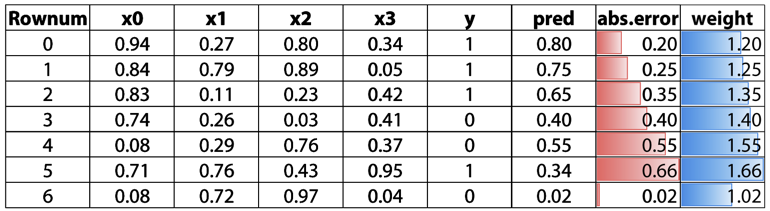

Then a weight column is just the absolute error + 1 (this makes the mistakes more significant, by making them look bigger or appear more times)

3. Add the "weight" to the training data.
4. Go back to 1


### Weighted boosting parameters

- Number of estimators. This can increase overfitting.
    - Start with 100
    
- Learning rate (shinkage or eta) because no new model should be trusted 100%. This can reduce overfitting by making it smaller.

$$
Prediction_N = pred_0 * eta + pred_1 * eta + \ldots + pred_N * eta
$$

- Input model. It can be anything that accepts weights
- Sub boosting type:
    - **AdaBoost**
    - LogitBoost (weka, java)

#### B. Residual based boosting

It's is one of the most successful, and it is what xgboost is based on.

This is what I think the steps are.

1. Create a bag as in bagging

2. Train a model and calculate (new) errors (not absolute errors)

3. Have your $y$, new_pred and old_pred as in the table

boosting.png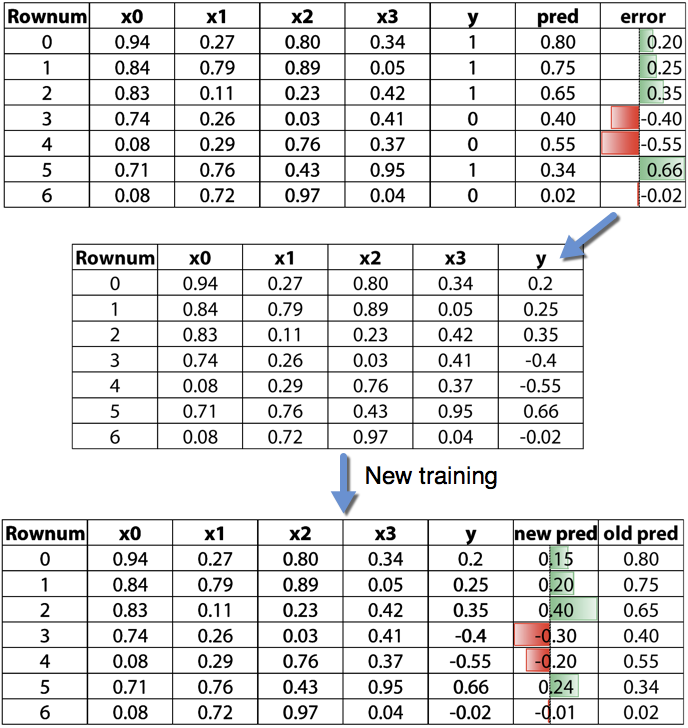

3. Calculate new predictions by summing up new_pred and old_pred

4. Go back to 1

This seems to work well because, for example, in the second row, **0.75 + 0.20 = 0.95** which is closer to the true target 1.

### Residual based boosting parameters

- Number of estimators. This can increase overfitting.
    - Start with 100
    
- Learning rate (shinkage or eta). This can reduce overfitting by making it smaller.

- Row (sub) sampling
- Column (sub) sampling
 
- Input model. It can be anything, but works better with trees.
- Sub boosting type:
    - **Fully gradient based**
    - Dart (in classification)
    
### Implementations

- XGBoost
- LightGBM
- H20's GBM (handles categorical vars)
- Catboost (strong initial parameters, handles categorical vars)
- Sklearn's GBM

### Example

If you call it this way, you are using the Core XGBoost Library, and not the scikit learn's

In [4]:
import xgboost as xgb

dm_train = xgb.DMatrix(X_train.values,
                       label=y_train.values,
                       feature_names=X_train.columns.values)
dm_test = xgb.DMatrix(X_test.values,
                       label=y_test.values,
                       feature_names=X_test.columns.values)

param = {'max_depth':1000, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.01, 
         'seed':1,
         'eval_metric':'auc',
        }

model = xgb.train(param, dm_train, num_boost_round=100)

y_pred = model.predict(dm_test)
score_xgboost = roc_auc_score(y_test.values.astype(float), y_pred)

print("boosting classifier accuracy %.4f" %(score_xgboost))

boosting classifier accuracy 0.6851
